In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
autism_dataset = pd.read_csv('train.csv')

In [5]:
autism_dataset.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [4]:
autism_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

### Data Preparation

In [6]:
autism_dataset.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [13]:
autism_columns = autism_dataset.columns
null_df = pd.DataFrame(autism_dataset.isnull().sum() / len(autism_dataset) * 100)

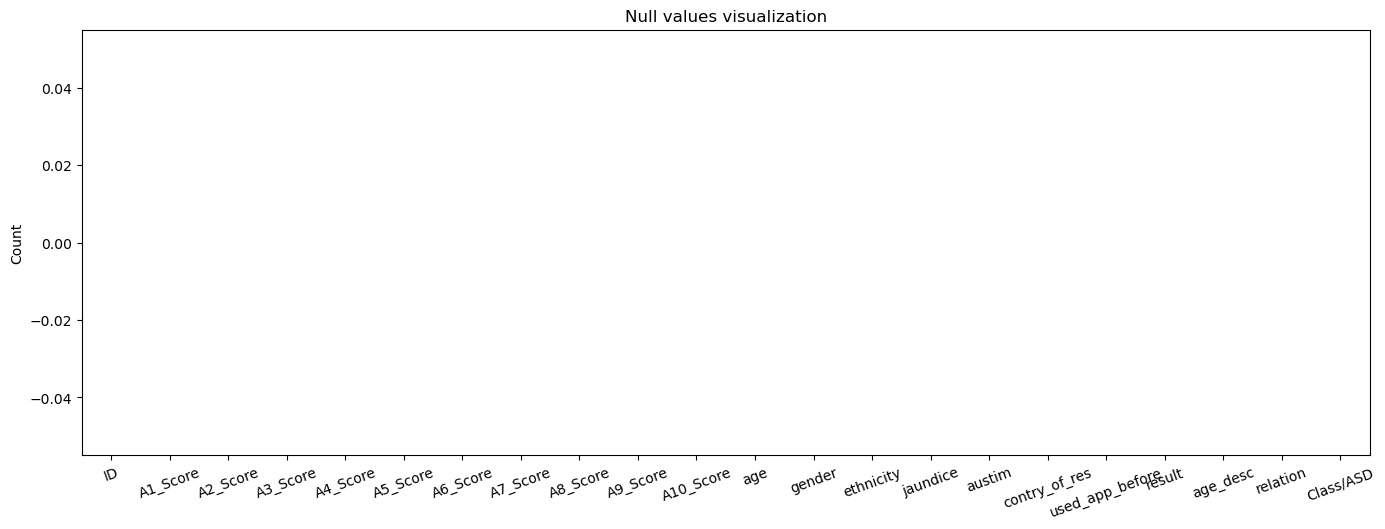

In [18]:
plt.figure(figsize = (14,5))
sns.barplot(x = null_df.index, y = null_df[0])

plt.title('Null values visualization')
plt.tight_layout()
plt.ylabel('Count')
plt.xticks(rotation = 20)
plt.show()

- Well there is null values in our dataset

In [5]:
autism_dataset.iloc[:, 11:]

,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,18.605397,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,13.829369,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,14.679893,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,61.035288,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,14.256686,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...
795,42.084907,f,White-European,no,yes,United States,no,13.390868,18 and more,Self,1
796,17.669291,f,Asian,no,no,New Zealand,no,9.454201,18 and more,Self,0
797,18.242557,m,White-European,yes,no,Jordan,no,6.805509,18 and more,Self,1
798,19.241473,f,Middle Eastern,no,yes,United States,no,3.682732,18 and more,Relative,0


In [6]:
autism_dataset['relation'].unique()

array(['Self', '?', 'Health care professional', 'Parent', 'Relative',
       'Others'], dtype=object)

In [7]:
autism_dataset['ethnicity'].unique()

array(['White-European', 'South Asian', 'Black', 'Asian',
       'Middle Eastern ', '?', 'others', 'Latino', 'Turkish', 'Others',
       'Hispanic', 'Pasifika'], dtype=object)

- If we observe clearly `relation` and `ethnicity` columns are having values like '?', 'Others', 'others' since they denote unknown
- let's maintain consistency for unknown values i.e., `Others`
- 'yes' -> 1 and 'no' -> 0
- 'm' 1 and 'f -> 0

In [8]:
autism_dataset.replace({'?':'Others', 'others':'Others', 'yes':1, 'no':0, 'm':1, 'f':0}, inplace=True)
autism_dataset

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,0,White-European,0,0,United States,0,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,0,South Asian,0,0,Australia,0,10.544296,18 and more,Others,0
2,3,1,1,1,1,1,1,0,0,1,...,0,White-European,0,0,United Kingdom,0,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,0,South Asian,0,0,New Zealand,0,1.530098,18 and more,Others,0
4,5,0,0,0,0,1,0,0,0,1,...,1,Black,0,1,Italy,0,7.949723,18 and more,Self,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,1,1,1,1,1,1,1,1,1,...,0,White-European,0,1,United States,0,13.390868,18 and more,Self,1
796,797,1,1,0,0,1,0,0,0,1,...,0,Asian,0,0,New Zealand,0,9.454201,18 and more,Self,0
797,798,0,0,0,0,0,0,1,0,1,...,1,White-European,1,0,Jordan,0,6.805509,18 and more,Self,1
798,799,1,1,1,1,1,1,0,1,1,...,0,Middle Eastern,0,1,United States,0,3.682732,18 and more,Relative,0


### Data Preprocessing

*Autism dataset is having categorical features which is incampatable for ML model so perform one-hot encode
on categorical features*

In [9]:
ethnicity_types = autism_dataset.ethnicity.unique()
ethnicity_dict = {}
for i, type in enumerate(ethnicity_types):
    ethnicity_dict.setdefault(type, i + 1)

autism_dataset.ethnicity.replace(ethnicity_dict, inplace = True)

In [10]:
countries = autism_dataset.contry_of_res.unique()
countries_dict = {}

for i, country in enumerate(countries):
    countries_dict.setdefault(country, i + 1)

autism_dataset.contry_of_res.replace(countries_dict, inplace = True)

### Splitting x_train, y_train and droping unnecessary features

In [12]:
y_train = autism_dataset['Class/ASD']

In [ ]:
x_train = autism_dataset.drop(labels = ['ID', 'used_app_before', 'result',	'age_desc',	'relation', 'Class/ASD'], axis = 1)

### Normalizing age feature

In [24]:
age_mean = x_train.age.mean()
age_std = x_train.age.std()

def scale_age(x):
    return (x - age_mean) / age_std

age_scaled = x_train.age.apply(scale_age)
x_train.age = age_scaled

### Normalizing ethnicity feature

In [29]:
ethnicity_mean = x_train.ethnicity.mean()
ethnicity_std = x_train.ethnicity.std()

def scale_ethnicity(x):
    return (x - ethnicity_mean) / ethnicity_std

ethnicity_scaled = x_train.ethnicity.apply(scale_ethnicity)
x_train.ethnicity = ethnicity_scaled

### Normalizing contry_of_res feature

In [31]:
contry_of_res_mean = x_train.contry_of_res.mean()
contry_of_res_std = x_train.contry_of_res.std()

def scale_contry_of_res(x):
    return (x - contry_of_res_mean) / contry_of_res_std

contry_of_res_scaled = x_train.contry_of_res.apply(scale_contry_of_res)
x_train.contry_of_res = contry_of_res_scaled

### Test Dataframe

In [119]:
x_test = pd.read_csv('test.csv')

In [120]:
x_test.replace({'?':'Others', 'others':'Others', 'yes':1, 'no':0, 'm':1, 'f':0}, inplace=True)

In [121]:
ethnicity_types = x_test.ethnicity.unique()
ethnicity_dict = {}
for i, type in enumerate(ethnicity_types):
    ethnicity_dict.setdefault(type, i + 1)

x_test.ethnicity.replace(ethnicity_dict, inplace = True)

In [122]:
countries = x_test.contry_of_res.unique()
countries_dict = {}

for i, country in enumerate(countries):
    countries_dict.setdefault(country, i + 1)

x_test.contry_of_res.replace(countries_dict, inplace = True)

In [123]:
age_mean = x_test.age.mean()
age_std = x_test.age.std()

def scale_age(x):
    return (x - age_mean) / age_std

age_scaled = x_test.age.apply(scale_age)
x_test.age = age_scaled

In [124]:
ethnicity_mean = x_test.ethnicity.mean()
ethnicity_std = x_test.ethnicity.std()

def scale_ethnicity(x):
    return (x - ethnicity_mean) / ethnicity_std

ethnicity_scaled = x_test.ethnicity.apply(scale_ethnicity)
x_test.ethnicity = ethnicity_scaled

In [125]:
contry_of_res_mean = x_test.contry_of_res.mean()
contry_of_res_std = x_test.contry_of_res.std()

def scale_contry_of_res(x):
    return (x - contry_of_res_mean) / contry_of_res_std

contry_of_res_scaled = x_test.contry_of_res.apply(scale_contry_of_res)
x_test.contry_of_res = contry_of_res_scaled

In [126]:
x_test = x_test.drop(labels = ['ID', 'used_app_before', 'result', 'age_desc', 'relation'], axis = 1)

In [127]:
x_test = x_test.to_numpy()

### Model training

- Choosing 'W' and 'b' parameters for model

In [51]:
# Initializing parameters(Weights, Bias)
def initialize_parameters(no_features):
    w = np.zeros(no_features)
    b = 0.1
    return w, b

In [94]:
def accuracy(y_hat, y):
    m = y_hat.shape[0]
    right = 0
    for i in range(m):
        if y[i] == y_hat[i]:
            right += 1
    return (right / m) * 100

In [40]:
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [113]:
def predict(x, w, b):
    m, n = x.shape
    cost = 0.
    final_cost = 0.
    y_hat = np.zeros(m)
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        y_hat[i] = sigmoid(z)
        
    y_hat = y_hat >= 0.5
    return y_hat

In [59]:
# Cost function      
def regularized_cost(x, y, w, b, lamb):                  
    # lamb-> Lamda
    m, n = x.shape
    cost = 0.
    final_cost = 0.
    
    for i in range(m):
        z = np.dot(x[i], w) + b
        fwb_i = sigmoid(z)
        cost += -y[i] * np.log(fwb_i) - (1 - y[i]) * np.log(1 - fwb_i)
    cost /= m

    regu_term = 0.
    for j in range(n):
        regu_term += (w[j]) ** 2
    regu_term *= (lamb / (2 * m))

    final_cost = cost + regu_term
    return final_cost

In [74]:
# Gradient function
def gradient(x, y, w, b, alpha, lamb):
    m, n = x.shape
    dj_dw = np.zeros(n)
    dj_db = 0.

    for i in range(m):
        z = np.dot(x[i], w) + b
        fwb_i = sigmoid(z)
        err = fwb_i - y[i]
        for j in range(n):
            dj_dw[j] += err * x[i, j]
        dj_db += err
    dj_dw /= m
    
    for j in range(n):
        dj_dw[j] += (lamb / m) * w[j]

    return dj_dw, dj_db

In [78]:
# Gradient descent 
def gradient_descent(x, y, w, b, no_iter, alpha, lamb):
    m, n = x.shape
    div = no_iter / 10
    cost_history = []
    
    for i in range(no_iter):
        dj_dw, dj_db = gradient(x, y, w, b, alpha, lamb)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if ((i + 1) % div) == 0:
            cost = regularized_cost(x, y, w, b, lamb)
            cost_history.append(cost)
            print(f'Iteration {i + 1} : Cost is {cost}')
    
    return w, b, cost_history

- convert x_train and y_train to numpy array from pandas dataframe

In [82]:
lamb = 0.01    
no_iter = 2000
alpha = 0.01

w_ini, b_ini = initialize_parameters(x_train.shape[1])
w_final, b_final, cost_history = gradient_descent(x_train, y_train, w_ini, b_ini, no_iter, alpha, lamb)

Iteration 200 : Cost is 0.41073593385770396
Iteration 400 : Cost is 0.3593244698291831
Iteration 600 : Cost is 0.3343286206755585
Iteration 800 : Cost is 0.32002216747857776
Iteration 1000 : Cost is 0.3109212354283811
Iteration 1200 : Cost is 0.30471646380382134
Iteration 1400 : Cost is 0.3002808859870757
Iteration 1600 : Cost is 0.29700040426027297
Iteration 1800 : Cost is 0.2945114913833025
Iteration 2000 : Cost is 0.2925849962684906


In [83]:
print(f'Initial para : \nb -> {b_ini}\nw -> {w_ini}'); print(f'Final para : \nb -> {b_final}\nw -> {w_final}')

Initial para : 
b -> 0.1
w -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Final para : 
b -> -3.79604623422315
w -> [ 0.30130859  0.38929581  0.68411283  0.65170984  0.53492898  0.62230406
  0.40524659  0.19172646  0.60496899  0.53212136  0.05068585 -0.07506319
 -0.19699698  0.23556269  0.37029309 -0.17823664]


In [114]:
predi = predict(x_train, w_final, b_final)

In [96]:
score = accuracy(predi, y_train)
print(f'Accuracy of model is {score:.2f}')

Accuracy of model is 88.12


### Testing Model

In [131]:
y_test = predict(x_test, w_final, b_final)

In [135]:
test_score = np.sum(y_test)
print(f'Testing True {test_score}')

Testing True 36
